In [1]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
import re
import numpy as np
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [2]:
# # Import agriculture land use data
# production_df = pd.read_csv("Production_Crops_Livestock_E_All_Data.csv")
# production_df

In [3]:
# production_df['Item'].unique()


In [4]:
# meat_prod_df = production_df[production_df['Item'].str.contains("Meat")]
# meat_prod_df = meat_prod_df[['Area', 'Item Code', 'Item', 'Year', 'Unit', 'Value', 'Element']].copy()
# meat_prod_df
# meat_prod_df.to_csv(r"Meat_Prod.csv")

In [5]:
# grain_prod_df = production_df[production_df['Item'].str.contains("Total" or "nes" or "Oilcrops" )]
# grain_prod_df = grain_prod_df[['Area', 'Item Code', 'Item', 'Year', 'Unit', 'Value', 'Element']].copy()
# grain_prod_df
# grain_prod_df.to_csv(r"Grain_Prod.csv")

In [6]:
# milk_prod_df = production_df[production_df['Item'].str.contains("Milk")]
# milk_prod_df = milk_prod_df[['Area', 'Item Code', 'Item', 'Year', 'Unit', 'Value', 'Element']].copy()
# milk_prod_df
# milk_prod_df.to_csv(r"Milk_Prod.csv")

In [7]:
# Import agriculture land use data
crop_prod_df = pd.read_csv("Grain_Prod.csv")
crop_prod_df

Unnamed: 0         Area  Item Code             Item  Year    Unit  \
0            10966  Afghanistan       1717   Cereals, Total  1961      ha   
1            10967  Afghanistan       1717   Cereals, Total  1962      ha   
2            10968  Afghanistan       1717   Cereals, Total  1963      ha   
3            10969  Afghanistan       1717   Cereals, Total  1964      ha   
4            10970  Afghanistan       1717   Cereals, Total  1965      ha   
...            ...          ...        ...              ...   ...     ...   
213648     2094552  North Korea       1729  Treenuts, Total  2016  tonnes   
213649     2094553  North Korea       1729  Treenuts, Total  2017  tonnes   
213650     2094554  North Korea       1729  Treenuts, Total  2018  tonnes   
213651     2094555  North Korea       1729  Treenuts, Total  2019  tonnes   
213652     2094556  North Korea       1729  Treenuts, Total  2020  tonnes   

            Value         Element  
0       3313500.0  Area harvested  
1       3425500.0  Area harvested  
2       3426500.0  Area harvested  
3       3446500.0  Area harvested  
4       3444500.0  Area harvested  
...           ...             ...  
213648    73277.0      Production  
213649    73528.0      Production  
213650    75254.0      Production  
213651    74790.0      Production  
213652    73927.0      Production  

[213653 rows x 8 columns]

In [8]:
crop_prod_df['Item'].unique()

array(['Cereals, Total', 'Citrus Fruit, Total', 'Meat, Total',
       'Milk, Total', 'Pulses, Total', 'Roots and Tubers, Total',
       'Treenuts, Total'], dtype=object)

In [9]:
crop_prod_df['Element'].unique()

array(['Area harvested', 'Yield', 'Production', 'Milk Animals'],
      dtype=object)

In [10]:
# Filter crop production dataframe

filter_list =  ['Cereals, Total', 'Pulses, Total', 'Roots and Tubers, Total']
crop_prod_df = crop_prod_df[crop_prod_df['Item'].isin(filter_list)]
crop_prod_df

Unnamed: 0         Area  Item Code                     Item  Year  \
0            10966  Afghanistan       1717           Cereals, Total  1961   
1            10967  Afghanistan       1717           Cereals, Total  1962   
2            10968  Afghanistan       1717           Cereals, Total  1963   
3            10969  Afghanistan       1717           Cereals, Total  1964   
4            10970  Afghanistan       1717           Cereals, Total  1965   
...            ...          ...        ...                      ...   ...   
213468     2094073  North Korea       1720  Roots and Tubers, Total  2016   
213469     2094074  North Korea       1720  Roots and Tubers, Total  2017   
213470     2094075  North Korea       1720  Roots and Tubers, Total  2018   
213471     2094076  North Korea       1720  Roots and Tubers, Total  2019   
213472     2094077  North Korea       1720  Roots and Tubers, Total  2020   

          Unit      Value         Element  
0           ha  3313500.0  Area harvested  
1           ha  3425500.0  Area harvested  
2           ha  3426500.0  Area harvested  
3           ha  3446500.0  Area harvested  
4           ha  3444500.0  Area harvested  
...        ...        ...             ...  
213468  tonnes   896895.0      Production  
213469  tonnes   791715.0      Production  
213470  tonnes   853369.0      Production  
213471  tonnes   998464.0      Production  
213472  tonnes   883121.0      Production  

[110373 rows x 8 columns]

In [11]:
# Create a pivot of the Element column data
crop_prod_wide_df=pd.pivot(crop_prod_df, index=['Year', 'Area','Item Code', 'Item'], columns = 'Element', values = 'Value') #Reshape from long to wide
crop_prod_wide_df

Element                                             Area harvested  \
Year Area        Item Code Item                                      
1961 Afghanistan 1717      Cereals, Total                3313500.0   
                 1720      Roots and Tubers, Total         15000.0   
                 1726      Pulses, Total                   20500.0   
     Africa      1717      Cereals, Total               57159091.0   
                 1720      Roots and Tubers, Total       8309028.0   
...                                                            ...   
2020 Zambia      1720      Roots and Tubers, Total        193716.0   
                 1726      Pulses, Total                   65398.0   
     Zimbabwe    1717      Cereals, Total                1486227.0   
                 1720      Roots and Tubers, Total         67680.0   
                 1726      Pulses, Total                  110032.0   

Element                                             Production     Yield  
Year Area        Item Code Item                                           
1961 Afghanistan 1717      Cereals, Total            3695000.0   11151.0  
                 1720      Roots and Tubers, Total    130000.0   86667.0  
                 1726      Pulses, Total               18000.0    8780.0  
     Africa      1717      Cereals, Total           46310719.0    8102.0  
                 1720      Roots and Tubers, Total  48019106.0   57791.0  
...                                                        ...       ...  
2020 Zambia      1720      Roots and Tubers, Total   4156601.0  214572.0  
                 1726      Pulses, Total               32347.0    4946.0  
     Zimbabwe    1717      Cereals, Total            1598038.0   10752.0  
                 1720      Roots and Tubers, Total    307296.0   45404.0  
                 1726      Pulses, Total               40932.0    3720.0  

[36988 rows x 3 columns]

In [12]:
#Rearrange the order of the columns
cols = crop_prod_df['Element'].unique()
crop_prod_wide_df=crop_prod_wide_df[cols]
crop_prod_wide_df

Element                                             Area harvested     Yield  \
Year Area        Item Code Item                                                
1961 Afghanistan 1717      Cereals, Total                3313500.0   11151.0   
                 1720      Roots and Tubers, Total         15000.0   86667.0   
                 1726      Pulses, Total                   20500.0    8780.0   
     Africa      1717      Cereals, Total               57159091.0    8102.0   
                 1720      Roots and Tubers, Total       8309028.0   57791.0   
...                                                            ...       ...   
2020 Zambia      1720      Roots and Tubers, Total        193716.0  214572.0   
                 1726      Pulses, Total                   65398.0    4946.0   
     Zimbabwe    1717      Cereals, Total                1486227.0   10752.0   
                 1720      Roots and Tubers, Total         67680.0   45404.0   
                 1726      Pulses, Total                  110032.0    3720.0   

Element                                             Production  
Year Area        Item Code Item                                 
1961 Afghanistan 1717      Cereals, Total            3695000.0  
                 1720      Roots and Tubers, Total    130000.0  
                 1726      Pulses, Total               18000.0  
     Africa      1717      Cereals, Total           46310719.0  
                 1720      Roots and Tubers, Total  48019106.0  
...                                                        ...  
2020 Zambia      1720      Roots and Tubers, Total   4156601.0  
                 1726      Pulses, Total               32347.0  
     Zimbabwe    1717      Cereals, Total            1598038.0  
                 1720      Roots and Tubers, Total    307296.0  
                 1726      Pulses, Total               40932.0  

[36988 rows x 3 columns]

In [13]:
# Reconstruct the dataframe with columns matching the element data
crop_prod_wide_df = pd.DataFrame(crop_prod_wide_df.to_records())
crop_prod_wide_df

Year         Area  Item Code                     Item  Area harvested  \
0      1961  Afghanistan       1717           Cereals, Total       3313500.0   
1      1961  Afghanistan       1720  Roots and Tubers, Total         15000.0   
2      1961  Afghanistan       1726            Pulses, Total         20500.0   
3      1961       Africa       1717           Cereals, Total      57159091.0   
4      1961       Africa       1720  Roots and Tubers, Total       8309028.0   
...     ...          ...        ...                      ...             ...   
36983  2020       Zambia       1720  Roots and Tubers, Total        193716.0   
36984  2020       Zambia       1726            Pulses, Total         65398.0   
36985  2020     Zimbabwe       1717           Cereals, Total       1486227.0   
36986  2020     Zimbabwe       1720  Roots and Tubers, Total         67680.0   
36987  2020     Zimbabwe       1726            Pulses, Total        110032.0   

          Yield  Production  
0       11151.0   3695000.0  
1       86667.0    130000.0  
2        8780.0     18000.0  
3        8102.0  46310719.0  
4       57791.0  48019106.0  
...         ...         ...  
36983  214572.0   4156601.0  
36984    4946.0     32347.0  
36985   10752.0   1598038.0  
36986   45404.0    307296.0  
36987    3720.0     40932.0  

[36988 rows x 7 columns]

In [14]:
crop_prod_wide_df['Yield'].max()


1162308.0

In [15]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

FID                               COUNTRY ISO     COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS  United States      US   
1    2  United States Minor Outlying Islands  UM  United States      US   
2    3                          Cook Islands  CK    New Zealand      NZ   
3    4                      French Polynesia  PF         France      FR   
4    5                                  Niue  NU    New Zealand      NZ   

   SHAPE_Leng  SHAPE_Area                                           geometry  
0    0.600124    0.013720  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1    0.480216    0.003216  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2    0.980664    0.013073  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...  
3    3.930211    0.175332  MULTIPOLYGON (((-149.17920 -17.87084, -149.258...  
4    0.541413    0.021414  POLYGON ((-169.89389 -19.14556, -169.93088 -19...

<AxesSubplot:>

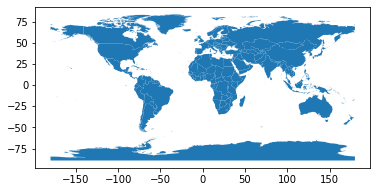

In [16]:
map_df.plot()

In [17]:
country_list = map_df["COUNTRY"].unique()
country_list.sort()
print(country_list)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda'
 'Bhutan' 'Bolivia' 'Bonaire' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'British Virgin Islands' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Canarias'
 'Cayman Islands' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Christmas Island' 'Cocos Islands' 'Colombia' 'Comoros' 'Congo'
 'Congo DRC' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czech Republic' "Côte d'Ivoire" 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'Frenc

In [18]:
crop_prod_wide_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     27326
False     9662
Name: Area, dtype: int64

In [19]:
map_df['COUNTRY'].isin(crop_prod_wide_df['Area']).value_counts()

True     183
False     66
Name: COUNTRY, dtype: int64

In [20]:
crop_prod_wide_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     27326
False     9662
Name: Area, dtype: int64

In [21]:
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('United States of America', 'United States')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('USSR', 'Russian Federation')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Republic of Korea', 'South Korea')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace("Democratic People's South Korea", 'South Korea')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace("Democratic People's Republic of Korea", 'North Korea')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace("C�te d'Ivoire", "Côte d'Ivoire")
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('R�union', 'Réunion')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Syrian Arab Republic', 'Syria')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('United Republic of Tanzania', 'Tanzania')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Ethiopia PDR', 'Ethiopia')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Viet Nam', 'Vietnam')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Sudan (former)', 'South Sudan')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace('Democratic Republic of the Congo', 'Congo DRC')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]


In [22]:
map_df['COUNTRY'].isin(crop_prod_wide_df['Area']).value_counts()

True     191
False     58
Name: COUNTRY, dtype: int64

In [23]:
crop_prod_wide_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     29093
False     7895
Name: Area, dtype: int64

In [24]:
# Create a list of countries in production file
area = crop_prod_wide_df['Area']
print(area)

0        Afghanistan
1        Afghanistan
2        Afghanistan
3             Africa
4             Africa
            ...     
36983         Zambia
36984         Zambia
36985       Zimbabwe
36986       Zimbabwe
36987       Zimbabwe
Name: Area, Length: 36988, dtype: object


In [25]:
# List country classifications that are not relevent
country_groups = ['Asia', 'Africa', 'Americas', 'Australia and New Zealand', 'Central America', 'Eastern Africa', 
    'Eastern Asia','Eastern Europe', 'European Union', 'Least Developed Countries', 
    'Land Locked Developing Countries', 'Low Income Food Deficit Countries',
    'Middle Africa', 'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Small Island Developing States',
    'South America', 'South', 'Southern Africa', 'Southern Asia', 'Southern Europe',
    'Western Africa', 'Western Asia', 'Western Europe']
    

In [26]:
# Loop through crop_prod_wide_df to remove unnessasary classifications
for country in country_groups:
    crop_prod_wide_df = crop_prod_wide_df[crop_prod_wide_df.Area != country]

In [27]:
crop_prod_wide_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium-Luxembourg', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Taiwan Province of',
       'China, mainland', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Cuba', 'Cyprus', 'Czechoslovakia', "Côte d'Ivoire",
       'South Korea', 'Congo DRC', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eswatini', 'Ethiopia', 'Europe',
       'European Union (27)', 'Faroe Islands', 'Fiji', 'Finland',
       'France', 'French Guyana', '

In [28]:
# Remove country, classifications
# Create selection criteria 1
form_one = r',.*$'

In [29]:
# Remove country () classifications
# Create selection criteria 2
form_two = r'\s\(.+?\)'

In [30]:
# Remove country- classifications
# Create selection criteria 3
form_three = r'\-.*$'

In [31]:
# Remove non-matching country classification based on selection criteria
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace(form_one, '')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace(form_two, '')
crop_prod_wide_df['Area'] = crop_prod_wide_df['Area'].str.replace(form_three, '')

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [32]:
crop_prod_wide_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Australia', 'Austria',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Caribbean',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czechoslovakia', "Côte d'Ivoire", 'South Korea', 'Congo DRC',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eswatini',
       'Ethiopia', 'Europe', 'European Union', 'Faroe Islands', 'Fiji',
       'Finland', 'France', 'French Guyana', 'French Polynesia', 'Gabon',
       'Gambia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guy

In [33]:
map_df['COUNTRY'].isin(crop_prod_wide_df['Area']).value_counts()

True     192
False     57
Name: COUNTRY, dtype: int64

In [34]:
# Create list of former USSR countries and create rows to add to dataframe
USSR_Countries = ['Turkmenistan', 'Uzbekistan', 'Belarus', 'Estonia', 'Latvia', 'Lithuania', 'Ukraine', 'Armenia', 'Georgia', 'Kazakhstan', 'Moldova', 'Kyrgyzstan', 'Tajikistan']
Ussr_df = crop_prod_wide_df.loc[(crop_prod_wide_df['Area'] == 'Russian Federation') & (crop_prod_wide_df['Year'] <= 1991)]
Ussr_df = Ussr_df.loc[Ussr_df.index.repeat(len(USSR_Countries))].reset_index(drop=True)
Ussr_df

Year                Area  Item Code            Item  Area harvested  \
0     1961  Russian Federation       1717  Cereals, Total     117968000.0   
1     1961  Russian Federation       1717  Cereals, Total     117968000.0   
2     1961  Russian Federation       1717  Cereals, Total     117968000.0   
3     1961  Russian Federation       1717  Cereals, Total     117968000.0   
4     1961  Russian Federation       1717  Cereals, Total     117968000.0   
...    ...                 ...        ...             ...             ...   
1204  1991  Russian Federation       1726   Pulses, Total       4948500.0   
1205  1991  Russian Federation       1726   Pulses, Total       4948500.0   
1206  1991  Russian Federation       1726   Pulses, Total       4948500.0   
1207  1991  Russian Federation       1726   Pulses, Total       4948500.0   
1208  1991  Russian Federation       1726   Pulses, Total       4948500.0   

        Yield   Production  
0     10068.0  118775508.0  
1     10068.0  118775508.0  
2     10068.0  118775508.0  
3     10068.0  118775508.0  
4     10068.0  118775508.0  
...       ...          ...  
1204  10382.0    5137500.0  
1205  10382.0    5137500.0  
1206  10382.0    5137500.0  
1207  10382.0    5137500.0  
1208  10382.0    5137500.0  

[1209 rows x 7 columns]

In [35]:
# Create data for USSR countries prior to 1992 using USSR data
x = 0
length = len(USSR_Countries)
for i, row in Ussr_df.iterrows():
    new_country = USSR_Countries[x]
    Ussr_df.loc[Ussr_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
Ussr_df     

Year          Area  Item Code            Item  Area harvested    Yield  \
0     1961  Turkmenistan       1717  Cereals, Total     117968000.0  10068.0   
1     1961    Uzbekistan       1717  Cereals, Total     117968000.0  10068.0   
2     1961       Belarus       1717  Cereals, Total     117968000.0  10068.0   
3     1961       Estonia       1717  Cereals, Total     117968000.0  10068.0   
4     1961        Latvia       1717  Cereals, Total     117968000.0  10068.0   
...    ...           ...        ...             ...             ...      ...   
1204  1991       Georgia       1726   Pulses, Total       4948500.0  10382.0   
1205  1991    Kazakhstan       1726   Pulses, Total       4948500.0  10382.0   
1206  1991       Moldova       1726   Pulses, Total       4948500.0  10382.0   
1207  1991    Kyrgyzstan       1726   Pulses, Total       4948500.0  10382.0   
1208  1991    Tajikistan       1726   Pulses, Total       4948500.0  10382.0   

       Production  
0     118775508.0  
1     118775508.0  
2     118775508.0  
3     118775508.0  
4     118775508.0  
...           ...  
1204    5137500.0  
1205    5137500.0  
1206    5137500.0  
1207    5137500.0  
1208    5137500.0  

[1209 rows x 7 columns]

In [36]:
# Add USSR country data to crop production dataframe
update_crop_df = pd.concat([crop_prod_wide_df, Ussr_df], ignore_index=True)
update_crop_df

Year         Area  Item Code                     Item  Area harvested  \
0      1961  Afghanistan       1717           Cereals, Total       3313500.0   
1      1961  Afghanistan       1720  Roots and Tubers, Total         15000.0   
2      1961  Afghanistan       1726            Pulses, Total         20500.0   
3      1961      Albania       1717           Cereals, Total        347764.0   
4      1961      Albania       1720  Roots and Tubers, Total          4185.0   
...     ...          ...        ...                      ...             ...   
33872  1991      Georgia       1726            Pulses, Total       4948500.0   
33873  1991   Kazakhstan       1726            Pulses, Total       4948500.0   
33874  1991      Moldova       1726            Pulses, Total       4948500.0   
33875  1991   Kyrgyzstan       1726            Pulses, Total       4948500.0   
33876  1991   Tajikistan       1726            Pulses, Total       4948500.0   

         Yield  Production  
0      11151.0   3695000.0  
1      86667.0    130000.0  
2       8780.0     18000.0  
3       8452.0    293932.0  
4      72134.0     30188.0  
...        ...         ...  
33872  10382.0   5137500.0  
33873  10382.0   5137500.0  
33874  10382.0   5137500.0  
33875  10382.0   5137500.0  
33876  10382.0   5137500.0  

[33877 rows x 7 columns]

In [37]:
# Create list of former Yugoslav countries and create rows to add to dataframe
Yugoslav_Countries = ['Slovania', 'Croatia', 'Bosnia', 'Montenegro', 'North Macedonia', 'Serbia']
yugo_df = crop_prod_wide_df.loc[(crop_prod_wide_df['Area'] == 'Yugoslav SFR') & (crop_prod_wide_df['Year'] <= 1991)]
yugo_df = yugo_df.loc[yugo_df.index.repeat(len(Yugoslav_Countries))].reset_index(drop=True)
yugo_df

Year          Area  Item Code            Item  Area harvested    Yield  \
0    1961  Yugoslav SFR       1717  Cereals, Total       5454763.0  16552.0   
1    1961  Yugoslav SFR       1717  Cereals, Total       5454763.0  16552.0   
2    1961  Yugoslav SFR       1717  Cereals, Total       5454763.0  16552.0   
3    1961  Yugoslav SFR       1717  Cereals, Total       5454763.0  16552.0   
4    1961  Yugoslav SFR       1717  Cereals, Total       5454763.0  16552.0   
..    ...           ...        ...             ...             ...      ...   
553  1991  Yugoslav SFR       1726   Pulses, Total        199745.0  12080.0   
554  1991  Yugoslav SFR       1726   Pulses, Total        199745.0  12080.0   
555  1991  Yugoslav SFR       1726   Pulses, Total        199745.0  12080.0   
556  1991  Yugoslav SFR       1726   Pulses, Total        199745.0  12080.0   
557  1991  Yugoslav SFR       1726   Pulses, Total        199745.0  12080.0   

     Production  
0     9028690.0  
1     9028690.0  
2     9028690.0  
3     9028690.0  
4     9028690.0  
..          ...  
553    241294.0  
554    241294.0  
555    241294.0  
556    241294.0  
557    241294.0  

[558 rows x 7 columns]

In [38]:
# Create data for Yugoslavic countries prior to 1992 using Yugoslav data
x = 0
length = len(Yugoslav_Countries)
for i, row in yugo_df.iterrows():
    new_country = Yugoslav_Countries[x]
    yugo_df.loc[yugo_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
yugo_df   

Year             Area  Item Code            Item  Area harvested  \
0    1961         Slovania       1717  Cereals, Total       5454763.0   
1    1961          Croatia       1717  Cereals, Total       5454763.0   
2    1961           Bosnia       1717  Cereals, Total       5454763.0   
3    1961       Montenegro       1717  Cereals, Total       5454763.0   
4    1961  North Macedonia       1717  Cereals, Total       5454763.0   
..    ...              ...        ...             ...             ...   
553  1991          Croatia       1726   Pulses, Total        199745.0   
554  1991           Bosnia       1726   Pulses, Total        199745.0   
555  1991       Montenegro       1726   Pulses, Total        199745.0   
556  1991  North Macedonia       1726   Pulses, Total        199745.0   
557  1991           Serbia       1726   Pulses, Total        199745.0   

       Yield  Production  
0    16552.0   9028690.0  
1    16552.0   9028690.0  
2    16552.0   9028690.0  
3    16552.0   9028690.0  
4    16552.0   9028690.0  
..       ...         ...  
553  12080.0    241294.0  
554  12080.0    241294.0  
555  12080.0    241294.0  
556  12080.0    241294.0  
557  12080.0    241294.0  

[558 rows x 7 columns]

In [39]:
# Add Yugoslav country data to crop production dataframe
new_crop_df = pd.concat([update_crop_df, yugo_df], ignore_index=True)
new_crop_df

Year             Area  Item Code                     Item  \
0      1961      Afghanistan       1717           Cereals, Total   
1      1961      Afghanistan       1720  Roots and Tubers, Total   
2      1961      Afghanistan       1726            Pulses, Total   
3      1961          Albania       1717           Cereals, Total   
4      1961          Albania       1720  Roots and Tubers, Total   
...     ...              ...        ...                      ...   
34430  1991          Croatia       1726            Pulses, Total   
34431  1991           Bosnia       1726            Pulses, Total   
34432  1991       Montenegro       1726            Pulses, Total   
34433  1991  North Macedonia       1726            Pulses, Total   
34434  1991           Serbia       1726            Pulses, Total   

       Area harvested    Yield  Production  
0           3313500.0  11151.0   3695000.0  
1             15000.0  86667.0    130000.0  
2             20500.0   8780.0     18000.0  
3            347764.0   8452.0    293932.0  
4              4185.0  72134.0     30188.0  
...               ...      ...         ...  
34430        199745.0  12080.0    241294.0  
34431        199745.0  12080.0    241294.0  
34432        199745.0  12080.0    241294.0  
34433        199745.0  12080.0    241294.0  
34434        199745.0  12080.0    241294.0  

[34435 rows x 7 columns]

In [40]:
# Remove Yugoslav data
new_crop_df = new_crop_df[new_crop_df.Area != 'Yugoslav SFR']
new_crop_df

Year             Area  Item Code                     Item  \
0      1961      Afghanistan       1717           Cereals, Total   
1      1961      Afghanistan       1720  Roots and Tubers, Total   
2      1961      Afghanistan       1726            Pulses, Total   
3      1961          Albania       1717           Cereals, Total   
4      1961          Albania       1720  Roots and Tubers, Total   
...     ...              ...        ...                      ...   
34430  1991          Croatia       1726            Pulses, Total   
34431  1991           Bosnia       1726            Pulses, Total   
34432  1991       Montenegro       1726            Pulses, Total   
34433  1991  North Macedonia       1726            Pulses, Total   
34434  1991           Serbia       1726            Pulses, Total   

       Area harvested    Yield  Production  
0           3313500.0  11151.0   3695000.0  
1             15000.0  86667.0    130000.0  
2             20500.0   8780.0     18000.0  
3            347764.0   8452.0    293932.0  
4              4185.0  72134.0     30188.0  
...               ...      ...         ...  
34430        199745.0  12080.0    241294.0  
34431        199745.0  12080.0    241294.0  
34432        199745.0  12080.0    241294.0  
34433        199745.0  12080.0    241294.0  
34434        199745.0  12080.0    241294.0  

[34342 rows x 7 columns]

In [41]:
# Create list of former Czechoslovakia countries and create rows to add to dataframe
Czech_Countries = ['Czeckia', 'Slovakia']
czech_df = crop_prod_wide_df.loc[(crop_prod_wide_df['Area'] == 'Czechoslovakia') & (crop_prod_wide_df['Year'] <= 1992)]
czech_df = czech_df.loc[czech_df.index.repeat(len(Czech_Countries))].reset_index(drop=True)
czech_df

Year            Area  Item Code                     Item  Area harvested  \
0    1961  Czechoslovakia       1717           Cereals, Total       2480163.0   
1    1961  Czechoslovakia       1717           Cereals, Total       2480163.0   
2    1961  Czechoslovakia       1720  Roots and Tubers, Total        512743.0   
3    1961  Czechoslovakia       1720  Roots and Tubers, Total        512743.0   
4    1961  Czechoslovakia       1726            Pulses, Total        135492.0   
..    ...             ...        ...                      ...             ...   
187  1992  Czechoslovakia       1717           Cereals, Total       2402256.0   
188  1992  Czechoslovakia       1720  Roots and Tubers, Total        161787.0   
189  1992  Czechoslovakia       1720  Roots and Tubers, Total        161787.0   
190  1992  Czechoslovakia       1726            Pulses, Total        155669.0   
191  1992  Czechoslovakia       1726            Pulses, Total        155669.0   

        Yield  Production  
0     23024.0   5710262.0  
1     23024.0   5710262.0  
2    103961.0   5330505.0  
3    103961.0   5330505.0  
4     11025.0    149379.0  
..        ...         ...  
187   42451.0  10197895.0  
188  162373.0   2626991.0  
189  162373.0   2626991.0  
190   23147.0    360334.0  
191   23147.0    360334.0  

[192 rows x 7 columns]

In [42]:
# Create data for Czechoslovakian countries prior to 1993 using Czechoslovakia data
x = 0
length = len(Czech_Countries)
for i, row in czech_df.iterrows():
    new_country = Czech_Countries[x]
    czech_df.loc[czech_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
czech_df

Year      Area  Item Code                     Item  Area harvested  \
0    1961   Czeckia       1717           Cereals, Total       2480163.0   
1    1961  Slovakia       1717           Cereals, Total       2480163.0   
2    1961   Czeckia       1720  Roots and Tubers, Total        512743.0   
3    1961  Slovakia       1720  Roots and Tubers, Total        512743.0   
4    1961   Czeckia       1726            Pulses, Total        135492.0   
..    ...       ...        ...                      ...             ...   
187  1992  Slovakia       1717           Cereals, Total       2402256.0   
188  1992   Czeckia       1720  Roots and Tubers, Total        161787.0   
189  1992  Slovakia       1720  Roots and Tubers, Total        161787.0   
190  1992   Czeckia       1726            Pulses, Total        155669.0   
191  1992  Slovakia       1726            Pulses, Total        155669.0   

        Yield  Production  
0     23024.0   5710262.0  
1     23024.0   5710262.0  
2    103961.0   5330505.0  
3    103961.0   5330505.0  
4     11025.0    149379.0  
..        ...         ...  
187   42451.0  10197895.0  
188  162373.0   2626991.0  
189  162373.0   2626991.0  
190   23147.0    360334.0  
191   23147.0    360334.0  

[192 rows x 7 columns]

In [43]:
# Add Czech country data to crop production dataframe
additional_crop_df = pd.concat([new_crop_df, czech_df], ignore_index=True)
additional_crop_df

Year         Area  Item Code                     Item  Area harvested  \
0      1961  Afghanistan       1717           Cereals, Total       3313500.0   
1      1961  Afghanistan       1720  Roots and Tubers, Total         15000.0   
2      1961  Afghanistan       1726            Pulses, Total         20500.0   
3      1961      Albania       1717           Cereals, Total        347764.0   
4      1961      Albania       1720  Roots and Tubers, Total          4185.0   
...     ...          ...        ...                      ...             ...   
34529  1992     Slovakia       1717           Cereals, Total       2402256.0   
34530  1992      Czeckia       1720  Roots and Tubers, Total        161787.0   
34531  1992     Slovakia       1720  Roots and Tubers, Total        161787.0   
34532  1992      Czeckia       1726            Pulses, Total        155669.0   
34533  1992     Slovakia       1726            Pulses, Total        155669.0   

          Yield  Production  
0       11151.0   3695000.0  
1       86667.0    130000.0  
2        8780.0     18000.0  
3        8452.0    293932.0  
4       72134.0     30188.0  
...         ...         ...  
34529   42451.0  10197895.0  
34530  162373.0   2626991.0  
34531  162373.0   2626991.0  
34532   23147.0    360334.0  
34533   23147.0    360334.0  

[34534 rows x 7 columns]

In [44]:
# Remove Czechoslovakia data
additional_crop_df = additional_crop_df[additional_crop_df.Area != 'Czechoslovakia']

In [45]:
# Create list to split Serbia and Montenegro countries and create rows to add to dataframe
Serb_Mont_Countries = ['Serbia', 'Montenegro']
SerbMont_df = crop_prod_wide_df.loc[(crop_prod_wide_df['Area'] == 'Serbia and Montenegro') & (crop_prod_wide_df['Year'] <= 2005)]
SerbMont_df = SerbMont_df.loc[SerbMont_df.index.repeat(len(Serb_Mont_Countries))].reset_index(drop=True)
SerbMont_df

Year                   Area  Item Code                     Item  \
0   1992  Serbia and Montenegro       1717           Cereals, Total   
1   1992  Serbia and Montenegro       1717           Cereals, Total   
2   1992  Serbia and Montenegro       1720  Roots and Tubers, Total   
3   1992  Serbia and Montenegro       1720  Roots and Tubers, Total   
4   1992  Serbia and Montenegro       1726            Pulses, Total   
..   ...                    ...        ...                      ...   
79  2005  Serbia and Montenegro       1717           Cereals, Total   
80  2005  Serbia and Montenegro       1720  Roots and Tubers, Total   
81  2005  Serbia and Montenegro       1720  Roots and Tubers, Total   
82  2005  Serbia and Montenegro       1726            Pulses, Total   
83  2005  Serbia and Montenegro       1726            Pulses, Total   

    Area harvested     Yield  Production  
0        2398779.0   29260.0   7018843.0  
1        2398779.0   29260.0   7018843.0  
2         110000.0   73364.0    807000.0  
3         110000.0   73364.0    807000.0  
4          38783.0   28363.0    110000.0  
..             ...       ...         ...  
79       1945861.0   48995.0   9533832.0  
80         95347.0  115619.0   1102392.0  
81         95347.0  115619.0   1102392.0  
82         47523.0   29452.0    139966.0  
83         47523.0   29452.0    139966.0  

[84 rows x 7 columns]

In [46]:
# Create data for Serbia and Montenegro countries prior to 1993 using Serbia/Montenegro data
x = 0
length = len(Serb_Mont_Countries)
for i, row in SerbMont_df.iterrows():
    new_country = Serb_Mont_Countries[x]
    SerbMont_df.loc[SerbMont_df.index[i], 'Area'] = new_country
    x += 1
    if x >= length:
        x = 0
SerbMont_df

Year        Area  Item Code                     Item  Area harvested  \
0   1992      Serbia       1717           Cereals, Total       2398779.0   
1   1992  Montenegro       1717           Cereals, Total       2398779.0   
2   1992      Serbia       1720  Roots and Tubers, Total        110000.0   
3   1992  Montenegro       1720  Roots and Tubers, Total        110000.0   
4   1992      Serbia       1726            Pulses, Total         38783.0   
..   ...         ...        ...                      ...             ...   
79  2005  Montenegro       1717           Cereals, Total       1945861.0   
80  2005      Serbia       1720  Roots and Tubers, Total         95347.0   
81  2005  Montenegro       1720  Roots and Tubers, Total         95347.0   
82  2005      Serbia       1726            Pulses, Total         47523.0   
83  2005  Montenegro       1726            Pulses, Total         47523.0   

       Yield  Production  
0    29260.0   7018843.0  
1    29260.0   7018843.0  
2    73364.0    807000.0  
3    73364.0    807000.0  
4    28363.0    110000.0  
..       ...         ...  
79   48995.0   9533832.0  
80  115619.0   1102392.0  
81  115619.0   1102392.0  
82   29452.0    139966.0  
83   29452.0    139966.0  

[84 rows x 7 columns]

In [47]:
# Add Serbia and Montenegro country data to crop production dataframe
final_crop_df = pd.concat([additional_crop_df, SerbMont_df], ignore_index=True)
final_crop_df

Year         Area  Item Code                     Item  Area harvested  \
0      1961  Afghanistan       1717           Cereals, Total       3313500.0   
1      1961  Afghanistan       1720  Roots and Tubers, Total         15000.0   
2      1961  Afghanistan       1726            Pulses, Total         20500.0   
3      1961      Albania       1717           Cereals, Total        347764.0   
4      1961      Albania       1720  Roots and Tubers, Total          4185.0   
...     ...          ...        ...                      ...             ...   
34517  2005   Montenegro       1717           Cereals, Total       1945861.0   
34518  2005       Serbia       1720  Roots and Tubers, Total         95347.0   
34519  2005   Montenegro       1720  Roots and Tubers, Total         95347.0   
34520  2005       Serbia       1726            Pulses, Total         47523.0   
34521  2005   Montenegro       1726            Pulses, Total         47523.0   

          Yield  Production  
0       11151.0   3695000.0  
1       86667.0    130000.0  
2        8780.0     18000.0  
3        8452.0    293932.0  
4       72134.0     30188.0  
...         ...         ...  
34517   48995.0   9533832.0  
34518  115619.0   1102392.0  
34519  115619.0   1102392.0  
34520   29452.0    139966.0  
34521   29452.0    139966.0  

[34522 rows x 7 columns]

In [48]:
# Remove Serbia and Montenegro data
final_crop_df = final_crop_df[final_crop_df.Area != 'Serbia and Montenegro']

In [49]:
map_df['COUNTRY'].isin(final_crop_df['Area']).value_counts()

True     193
False     56
Name: COUNTRY, dtype: int64

In [50]:
final_crop_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     32078
False     2402
Name: Area, dtype: int64

In [51]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(final_crop_df.set_index("Area"))
merged.head()

FID ISO   COUNTRYAFF AFF_ISO  SHAPE_Leng  SHAPE_Area  \
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   
Afghanistan  192  AF  Afghanistan      AF    50.80321   62.566714   

                                                      geometry    Year  \
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  1961.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  1961.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  1961.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  1962.0   
Afghanistan  POLYGON ((61.27655 35.60725, 61.29638 35.62854...  1962.0   

             Item Code                     Item  Area harvested    Yield  \
Afghanistan     1717.0           Cereals, Total       3313500.0  11151.0   
Afghanistan     1720.0  Roots and Tubers, Total         15000.0  86667.0   
Afghanistan     1726.0            Pulses, Total         20500.0   8780.0   
Afghanistan     1717.0           Cereals, Total       3425500.0  10790.0   
Afghanistan     1720.0  Roots and Tubers, Total         15000.0  76667.0   

             Production  
Afghanistan   3695000.0  
Afghanistan    130000.0  
Afghanistan     18000.0  
Afghanistan   3696000.0  
Afghanistan    115000.0

In [52]:
# Transform Yield data from hg/ha to MT/ha
merged['YIELD_MT_HA'] = round(merged['Yield']/10000, 3)

In [53]:
# Get a list of years for data loops
from datetime import date

start = date(1961, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)


[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [54]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 12

In [55]:
world_data_df = final_crop_df.loc[(final_crop_df['Area'] == 'World') & (final_crop_df['Item Code'] == 1717)]
world_data_df['YIELD_MT_HA'] = round(final_crop_df['Yield']/10000, 3)
world_data_df['YIELD_MT_HA'] = world_data_df['YIELD_MT_HA'].astype('string')
world_data_df
result = []
for value in world_data_df['YIELD_MT_HA']:
    text = f"{value} MT/ha"
    result.append(text)
world_data_df['YIELD_MT_HA_Text'] = result
world_data_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

Year   Area  Item Code            Item  Area harvested    Yield  \
485    1961  World       1717  Cereals, Total     647997186.0  13532.0   
982    1962  World       1717  Cereals, Total     653839500.0  14275.0   
1479   1963  World       1717  Cereals, Total     659234467.0  14401.0   
1976   1964  World       1717  Cereals, Total     670231863.0  14938.0   
2473   1965  World       1717  Cereals, Total     667195174.0  14967.0   
2971   1966  World       1717  Cereals, Total     669678977.0  16102.0   
3469   1967  World       1717  Cereals, Total     679890949.0  16533.0   
3968   1968  World       1717  Cereals, Total     684204602.0  16964.0   
4467   1969  World       1717  Cereals, Total     685279125.0  17088.0   
4966   1970  World       1717  Cereals, Total     675463526.0  17655.0   
5467   1971  World       1717  Cereals, Total     686870089.0  18922.0   
5968   1972  World       1717  Cereals, Total     677270412.0  18582.0   
6470   1973  World       1717  Cereals, Total     699334879.0  19404.0   
6972   1974  World       1717  Cereals, Total     700898903.0  18926.0   
7475   1975  World       1717  Cereals, Total     710954389.0  19126.0   
7978   1976  World       1717  Cereals, Total     722485252.0  20259.0   
8481   1977  World       1717  Cereals, Total     719085337.0  20253.0   
8983   1978  World       1717  Cereals, Total     714992391.0  22126.0   
9485   1979  World       1717  Cereals, Total     706548873.0  21761.0   
9987   1980  World       1717  Cereals, Total     717193878.0  21611.0   
10490  1981  World       1717  Cereals, Total     726546296.0  22468.0   
10993  1982  World       1717  Cereals, Total     714354380.0  23693.0   
11496  1983  World       1717  Cereals, Total     704731704.0  23086.0   
11999  1984  World       1717  Cereals, Total     714975901.0  24991.0   
12502  1985  World       1717  Cereals, Total     720191474.0  25288.0   
13005  1986  World       1717  Cereals, Total     717351224.0  25567.0   
13508  1987  World       1717  Cereals, Total     697526906.0  25397.0   
14012  1988  World       1717  Cereals, Total     702301651.0  24600.0   
14516  1989  World       1717  Cereals, Total     711765521.0  26292.0   
15020  1990  World       1717  Cereals, Total     707684899.0  27579.0   
15532  1991  World       1717  Cereals, Total     704276630.0  26842.0   
16104  1992  World       1717  Cereals, Total     708853824.0  27841.0   
16686  1993  World       1717  Cereals, Total     694803844.0  27406.0   
17270  1994  World       1717  Cereals, Total     695244027.0  28104.0   
17854  1995  World       1717  Cereals, Total     685471860.0  27709.0   
18438  1996  World       1717  Cereals, Total     699966370.0  29448.0   
19022  1997  World       1717  Cereals, Total     700891231.0  29896.0   
19606  1998  World       1717  Cereals, Total     680628249.0  30640.0   
20190  1999  World       1717  Cereals, Total     670058025.0  31076.0   
20777  2000  World       1717  Cereals, Total     672246282.0  30622.0   
21364  2001  World       1717  Cereals, Total     672463665.0  31301.0   
21951  2002  World       1717  Cereals, Total     661719646.0  31037.0   
22538  2003  World       1717  Cereals, Total     670563953.0  30927.0   
23125  2004  World       1717  Cereals, Total     676757300.0  33773.0   
23712  2005  World       1717  Cereals, Total     693839382.0  32668.0   
24302  2006  World       1717  Cereals, Total     682234859.0  33061.0   
24883  2007  World       1717  Cereals, Total     695712529.0  33719.0   
25464  2008  World       1717  Cereals, Total     712438787.0  35362.0   
26045  2009  World       1717  Cereals, Total     699821770.0  35544.0   
26626  2010  World       1717  Cereals, Total     694305043.0  35453.0   
27207  2011  World       1717  Cereals, Total     706797151.0  36541.0   
27791  2012  World       1717  Cereals, Total     707212147.0  36143.0   
28375  2013  World       1717  Cereals, Total     722700113.0  38175.0   
28959  2014

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


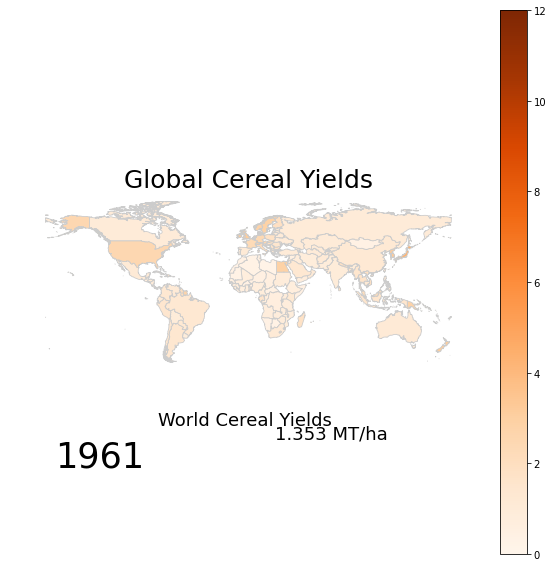

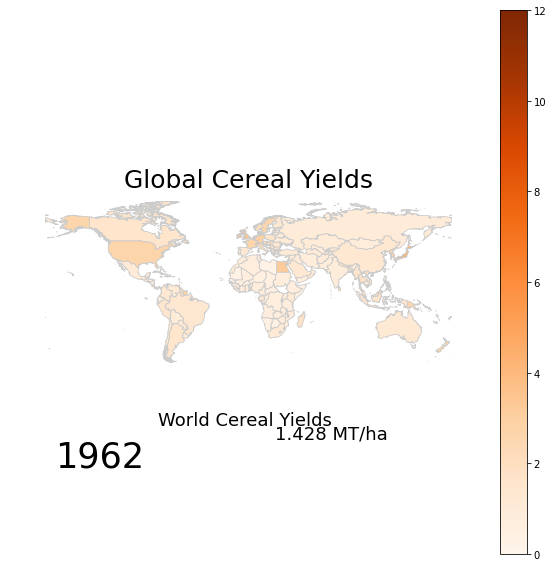

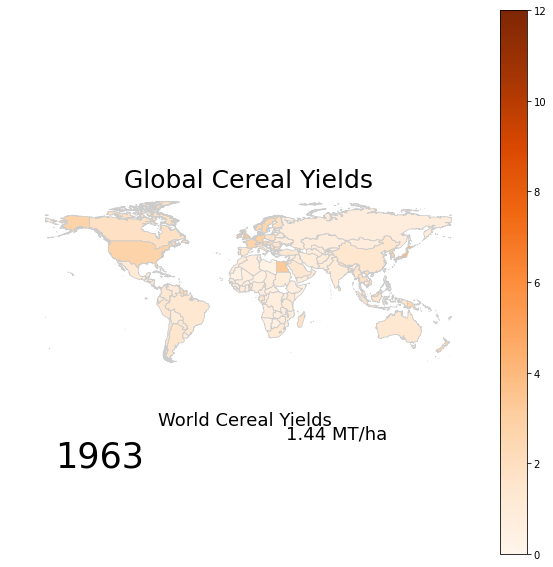

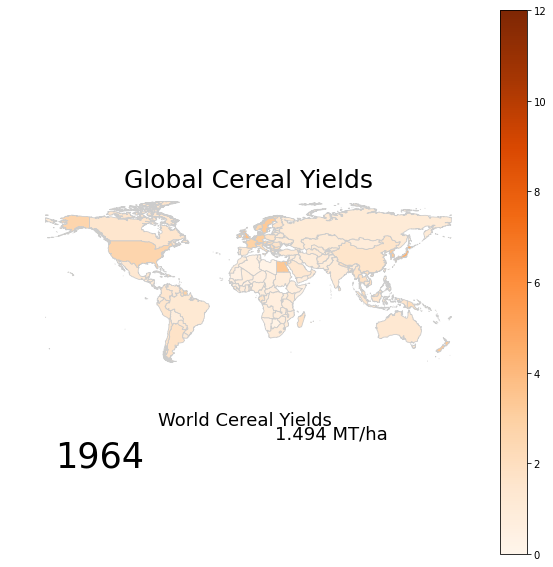

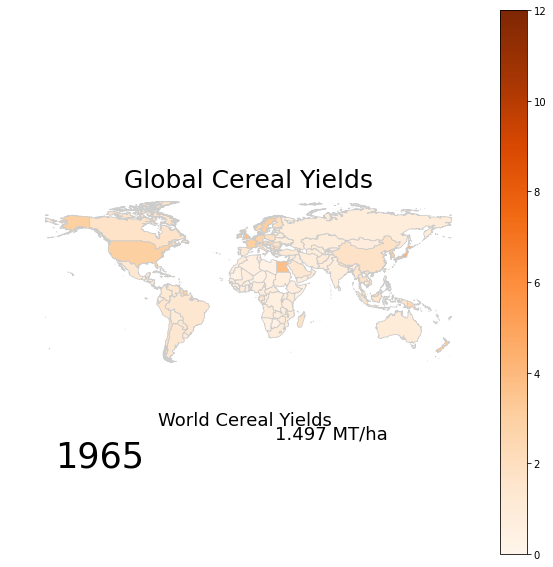

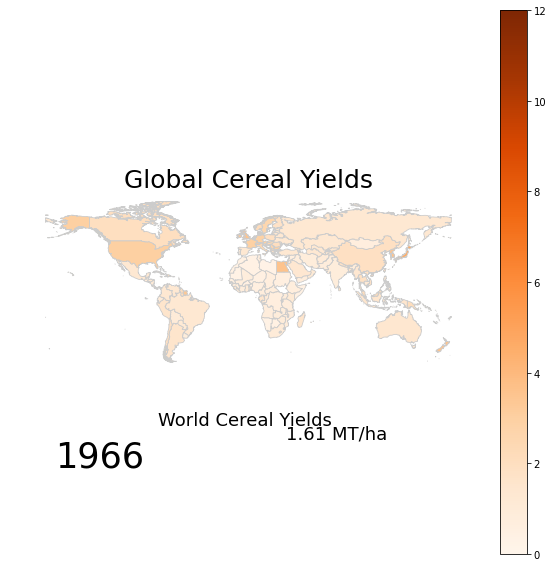

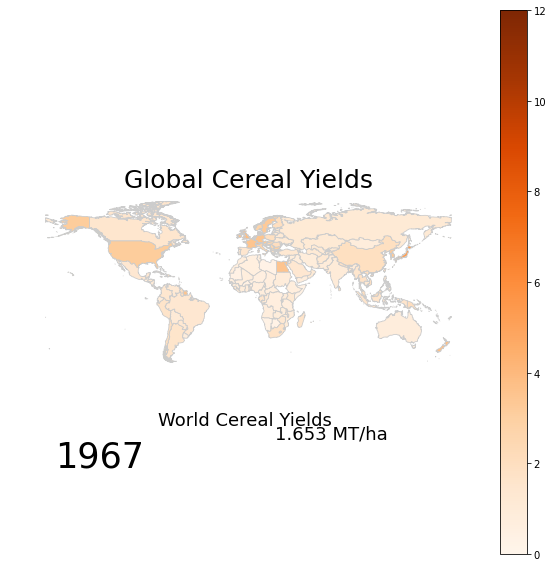

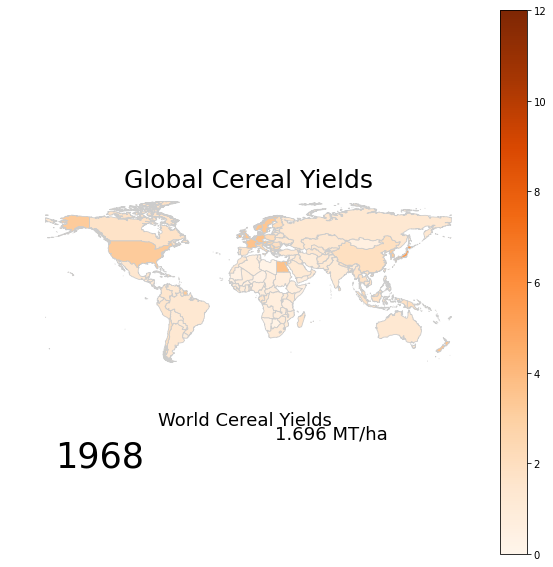

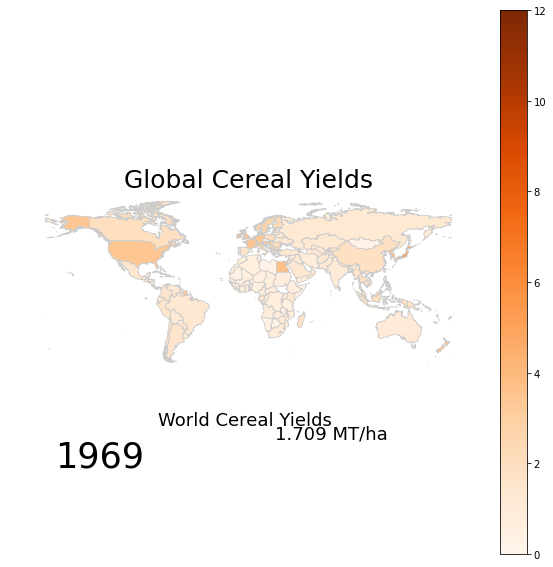

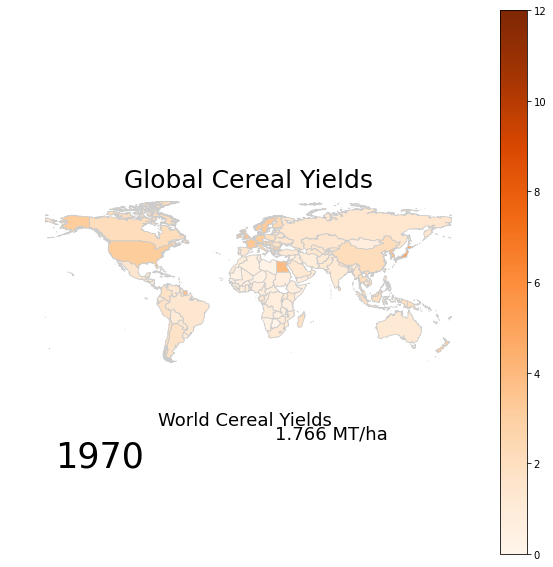

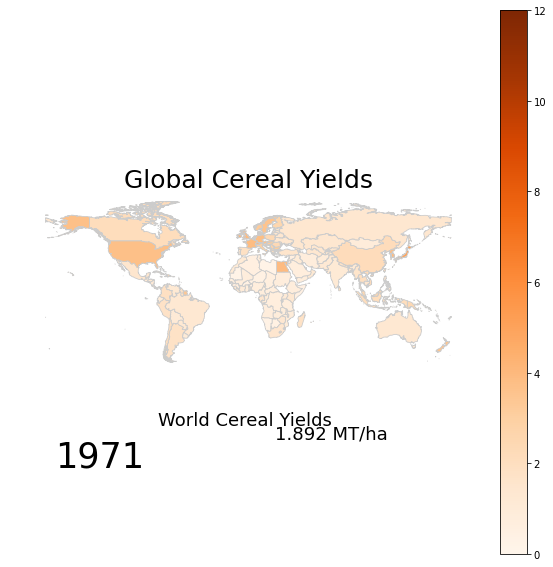

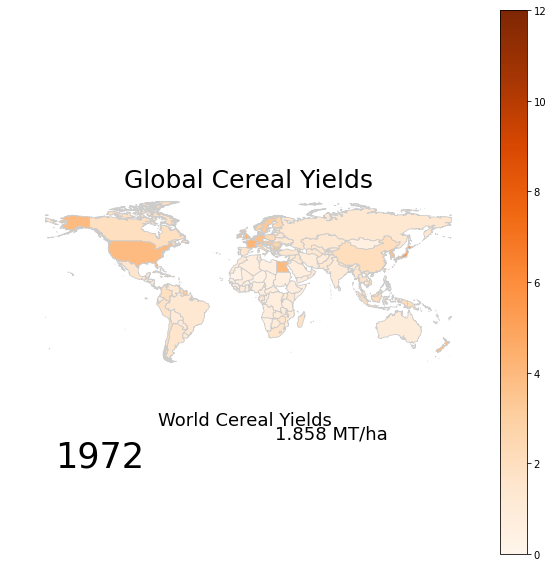

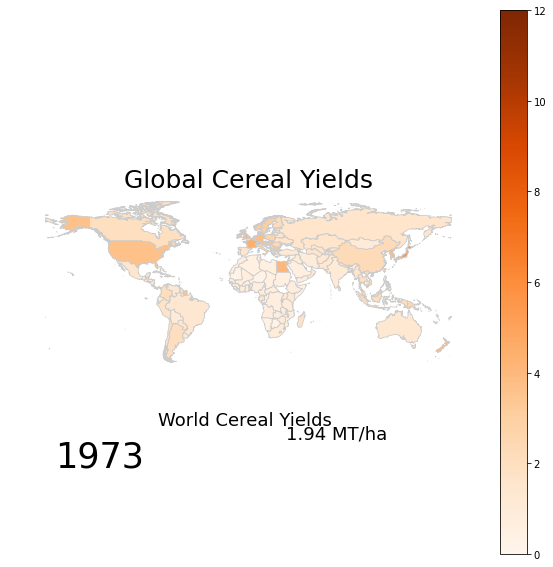

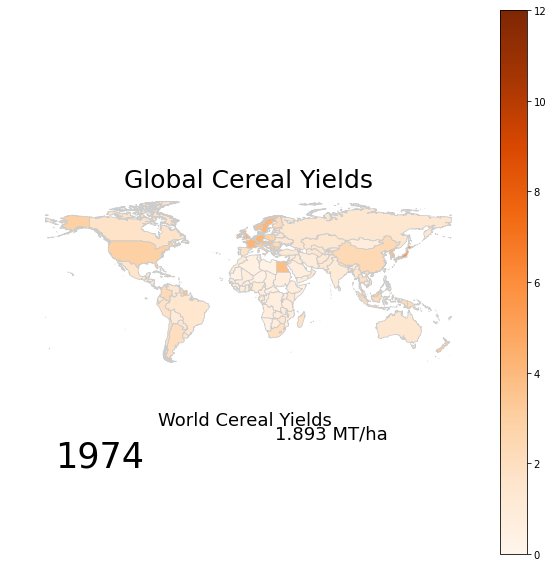

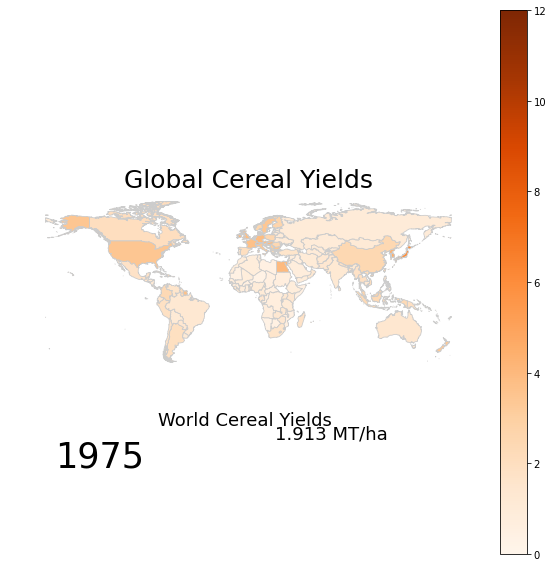

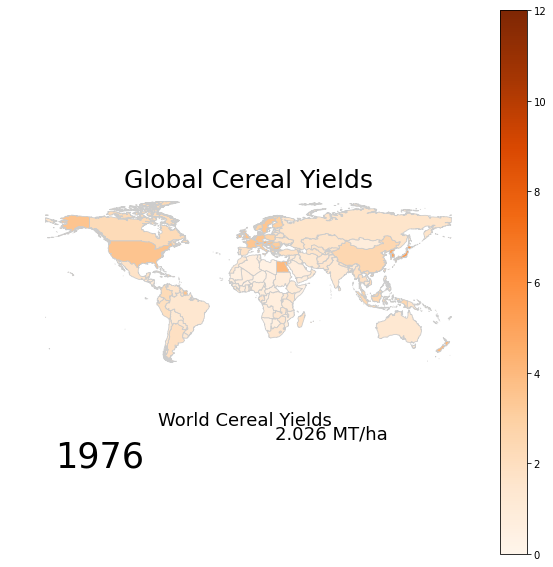

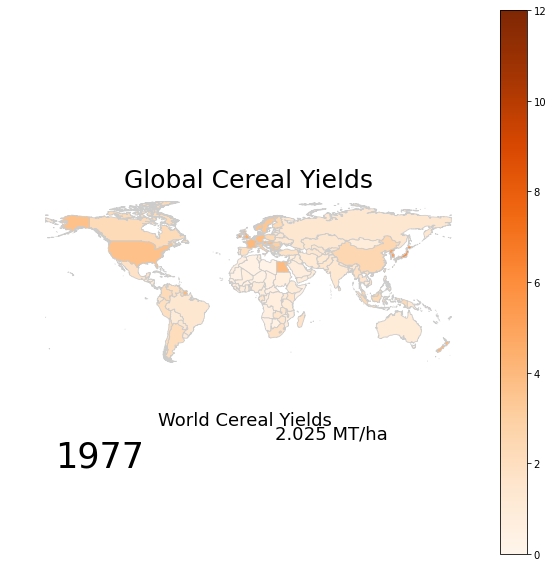

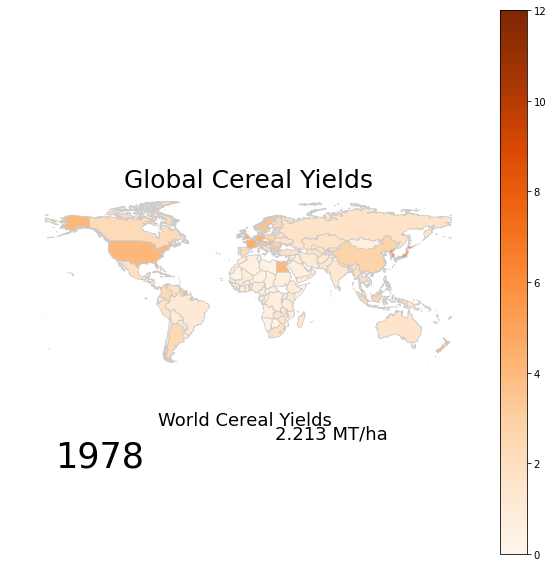

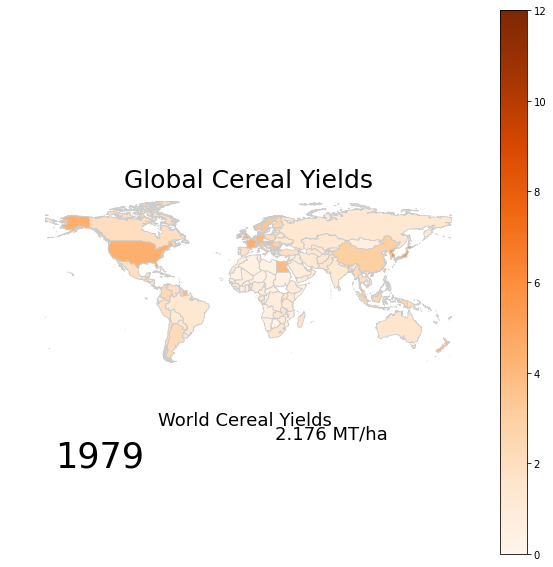

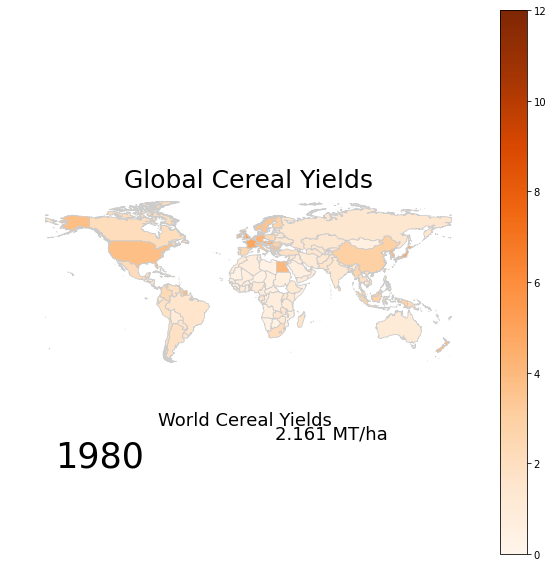

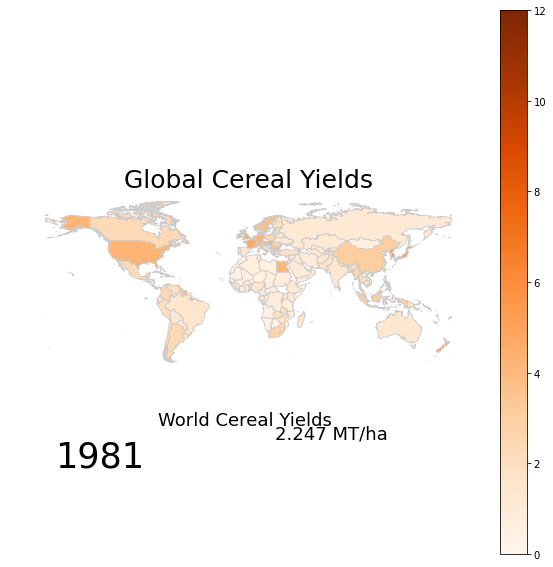

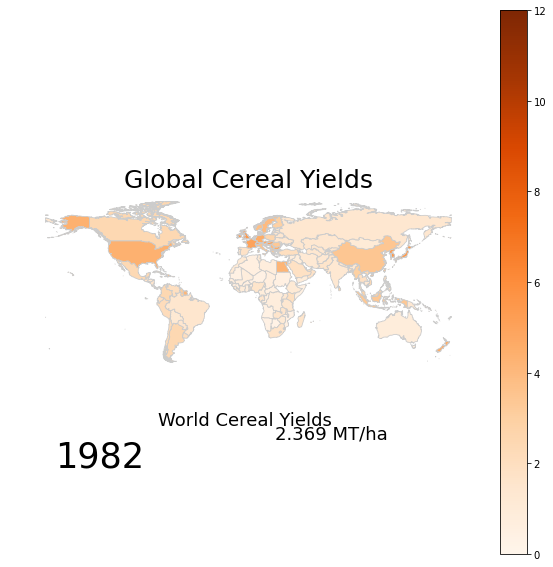

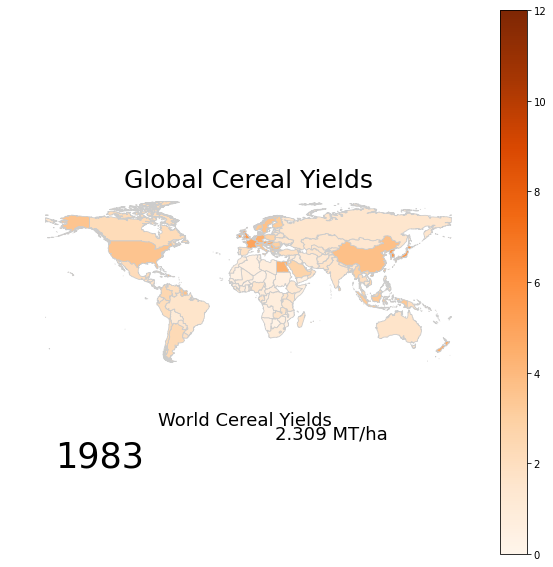

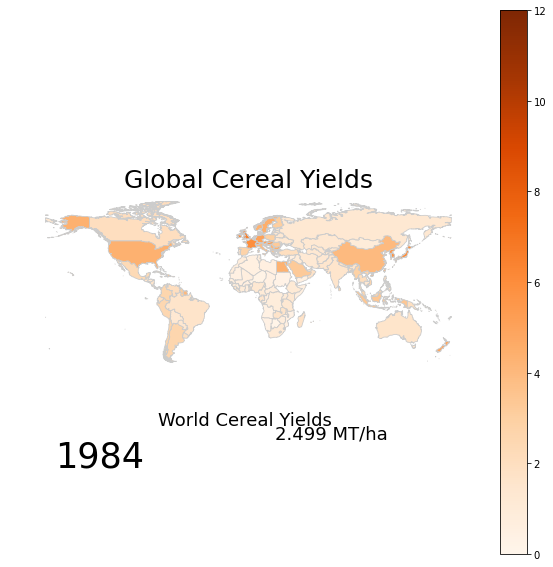

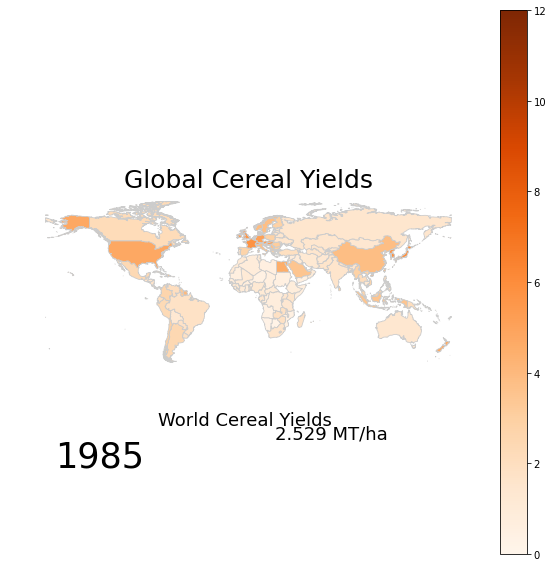

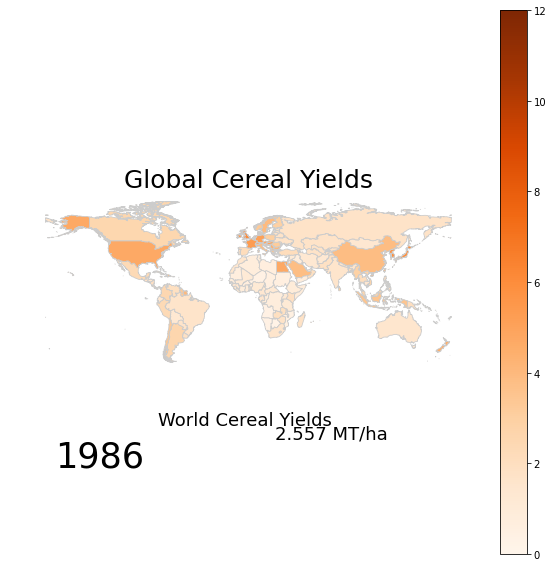

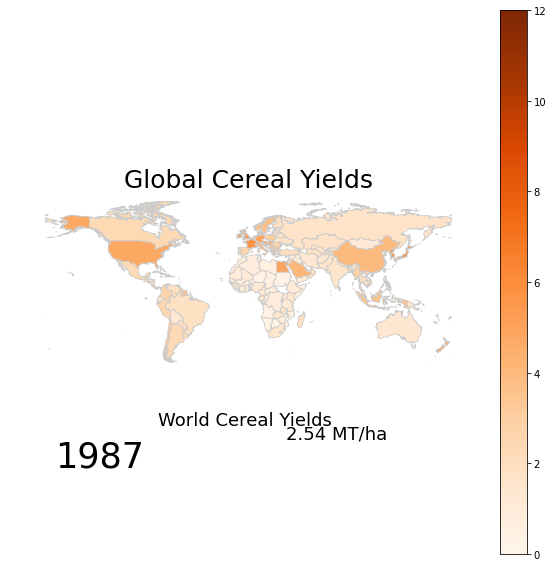

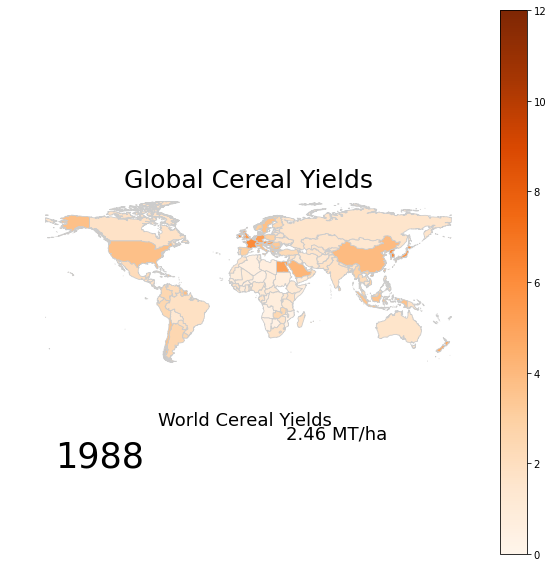

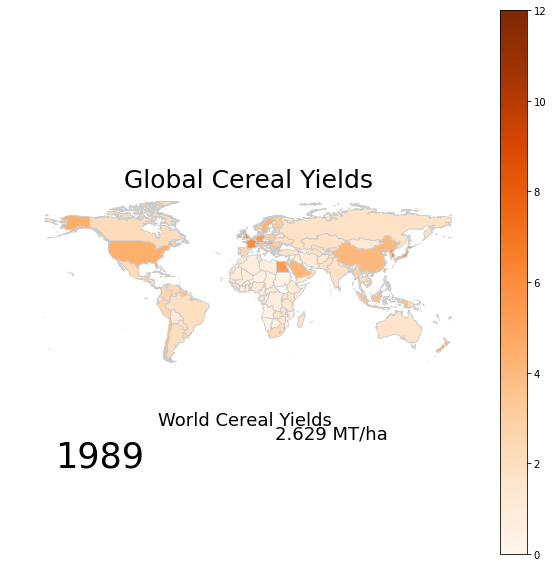

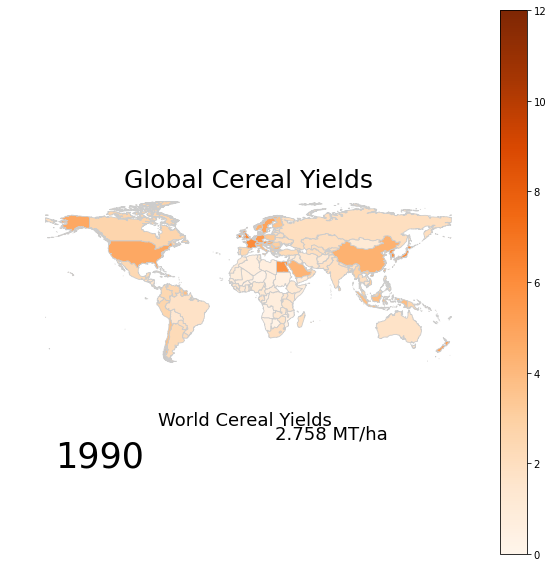

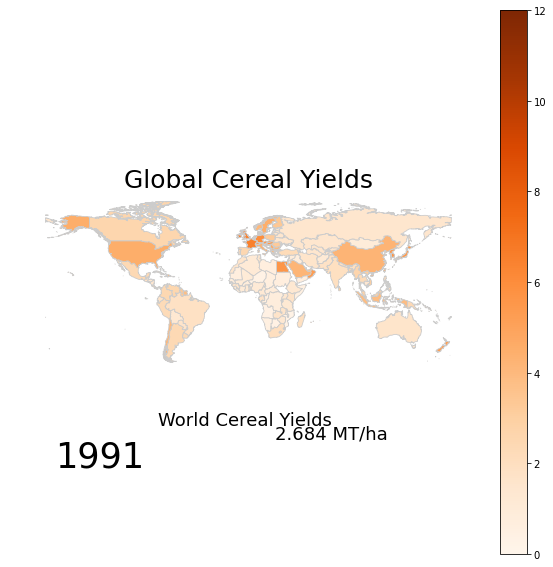

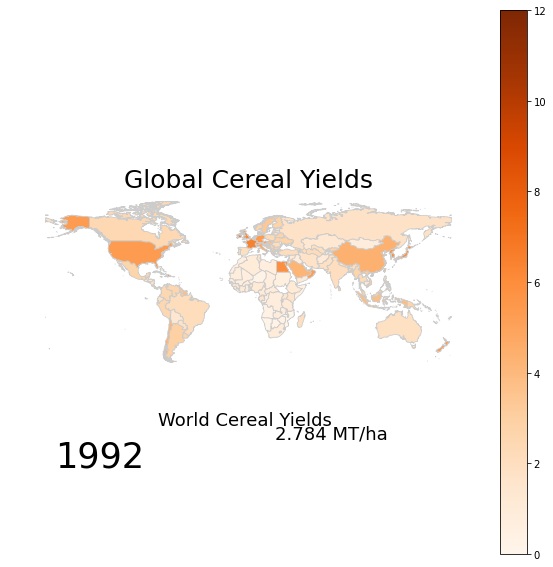

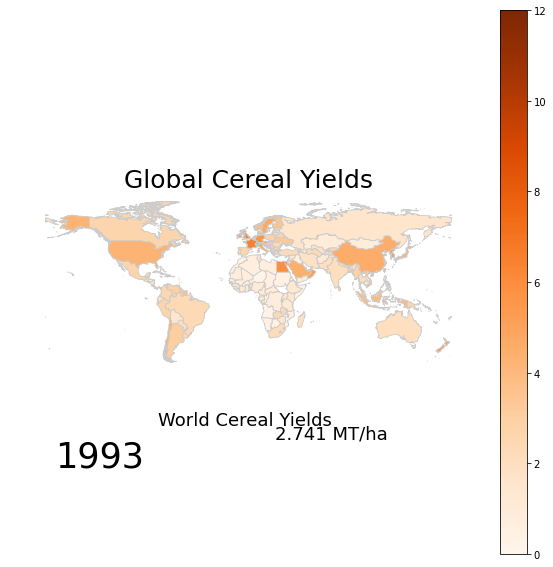

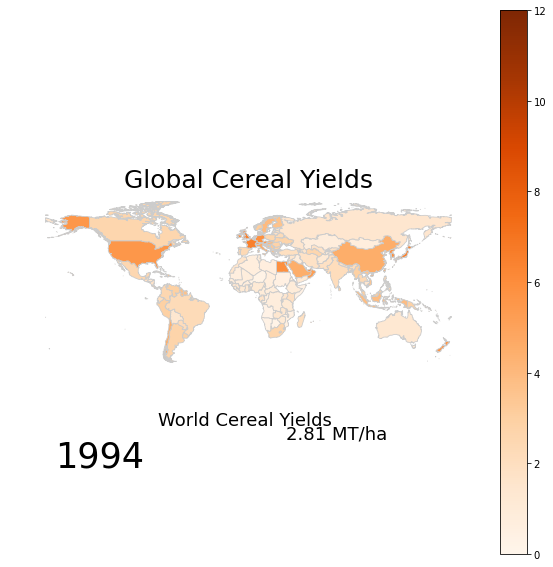

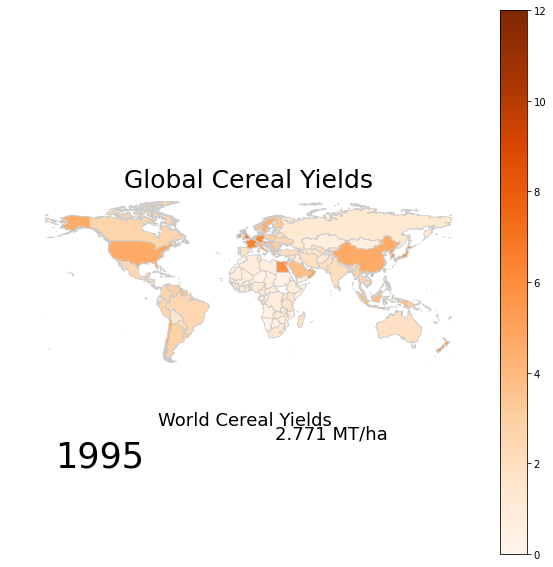

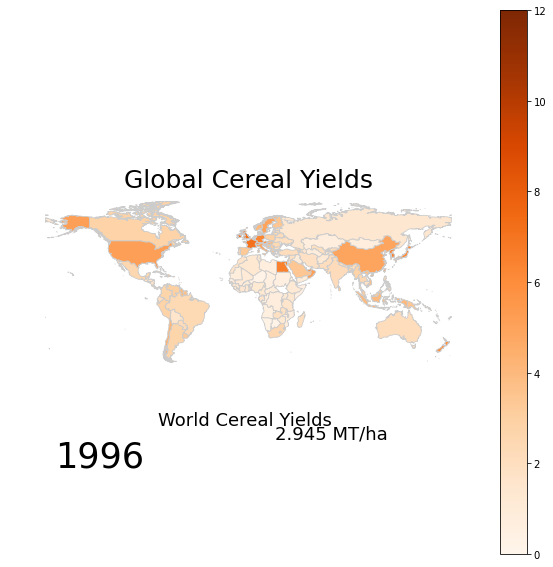

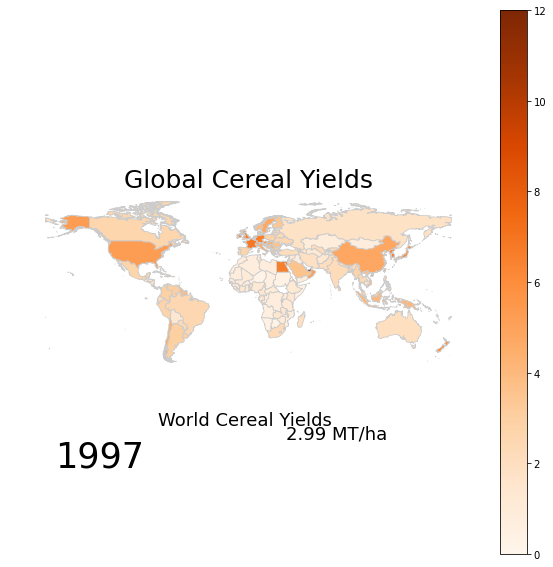

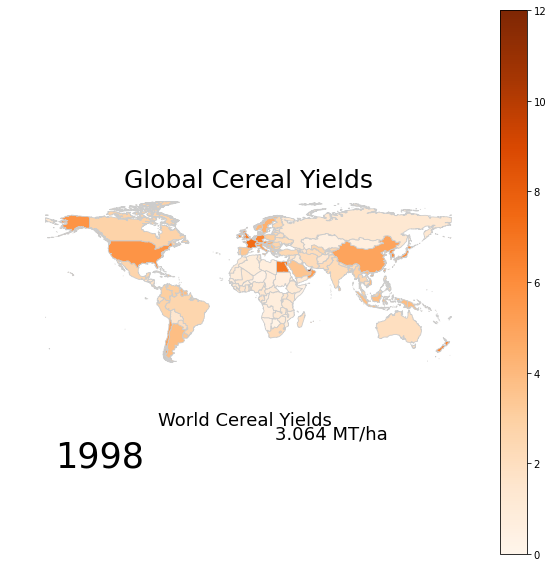

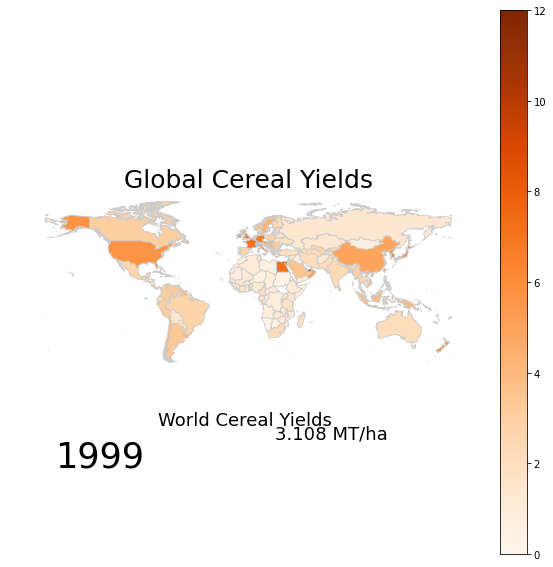

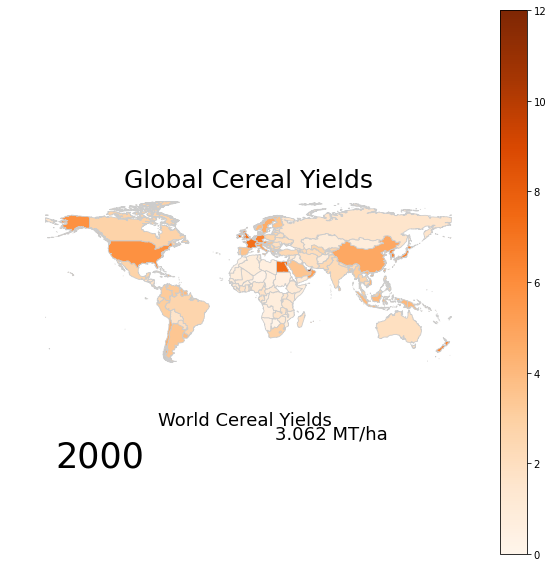

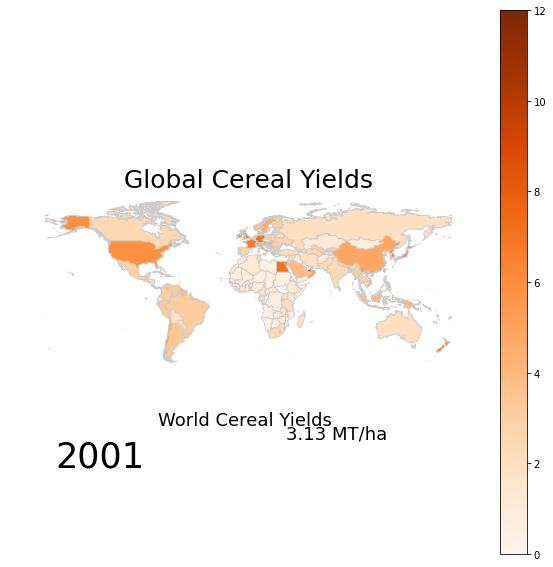

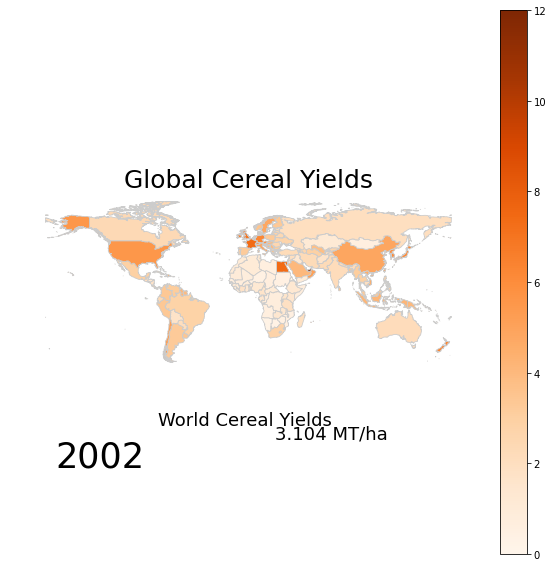

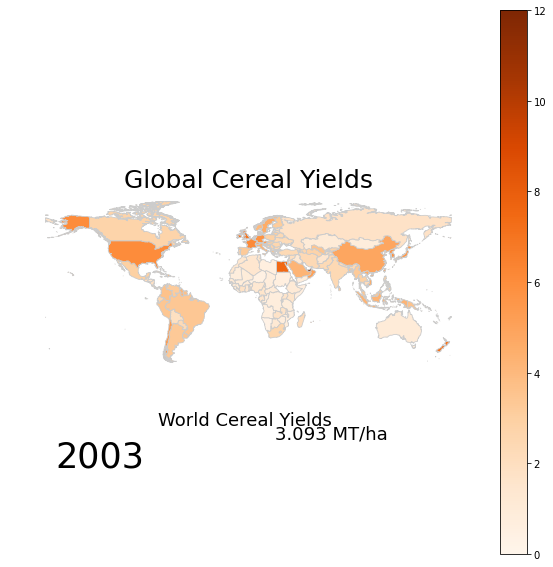

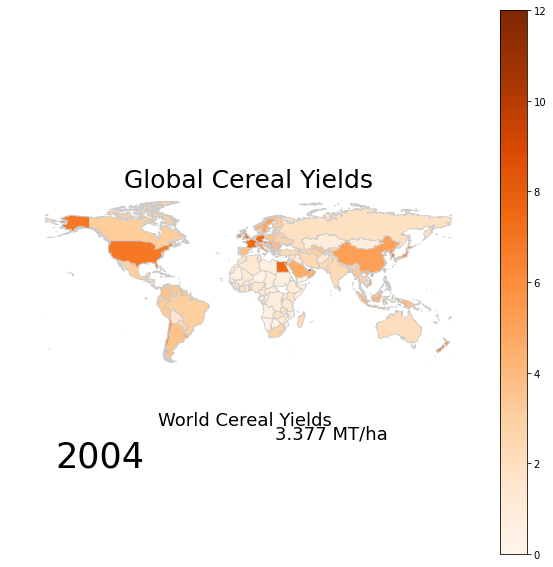

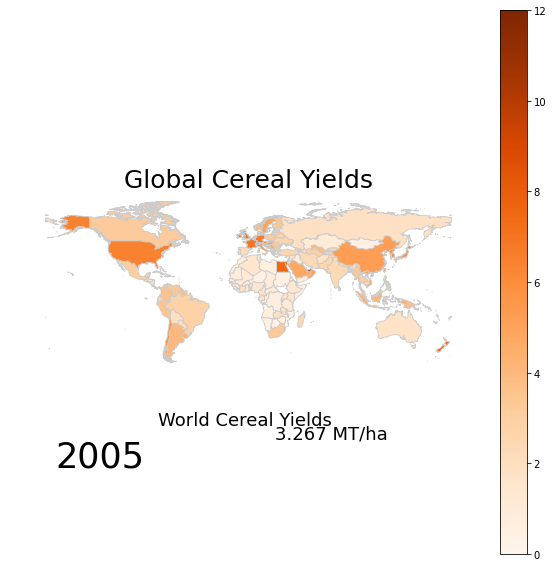

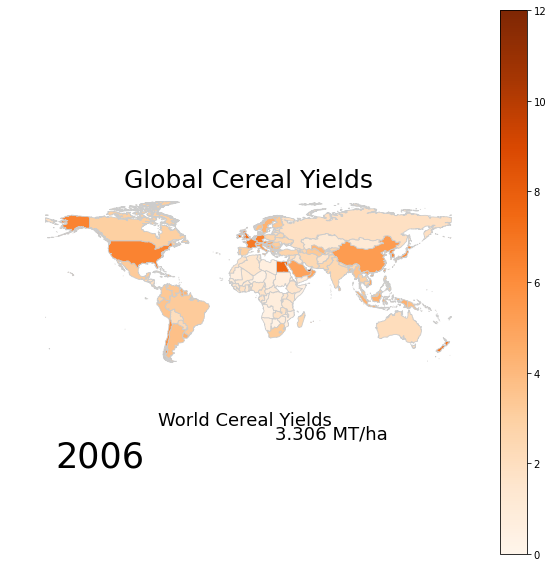

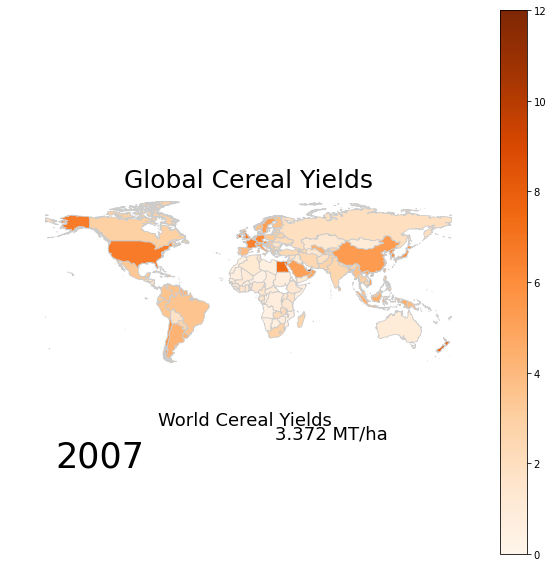

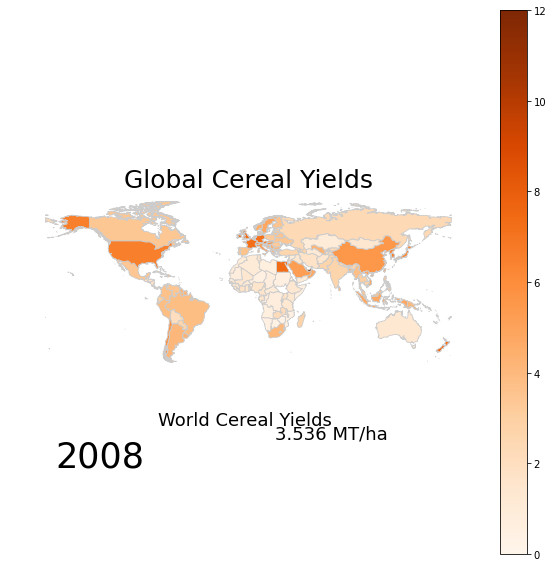

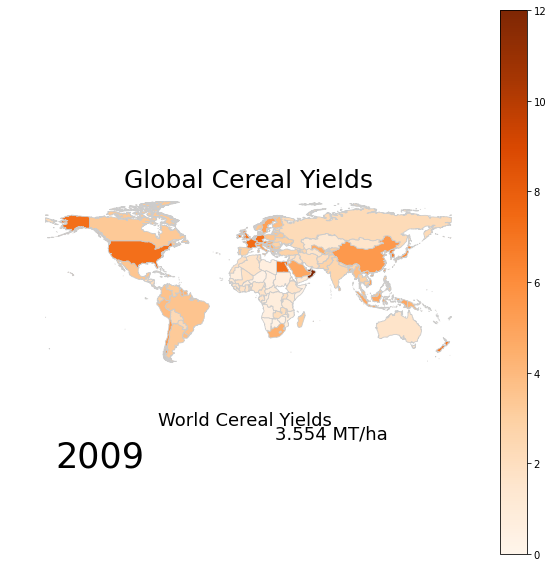

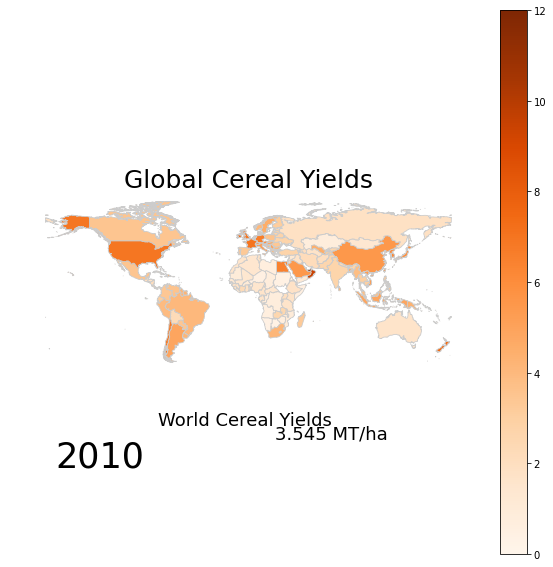

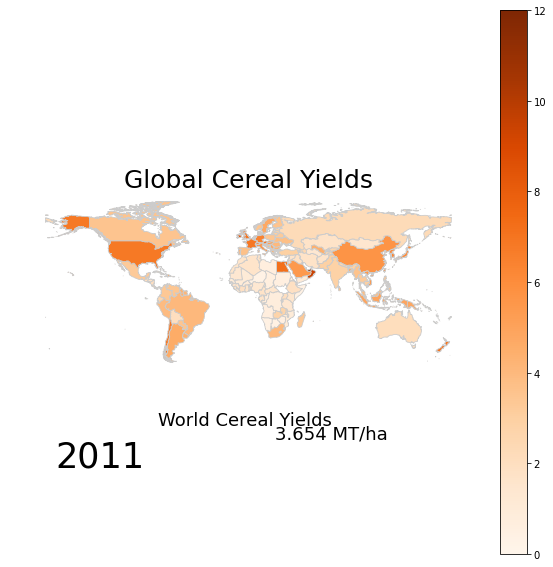

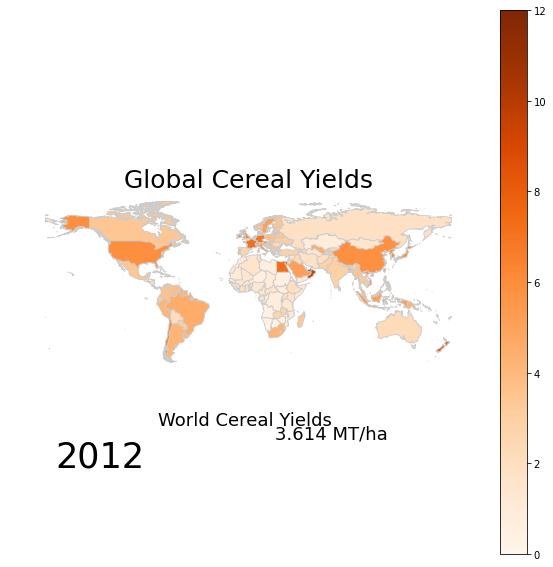

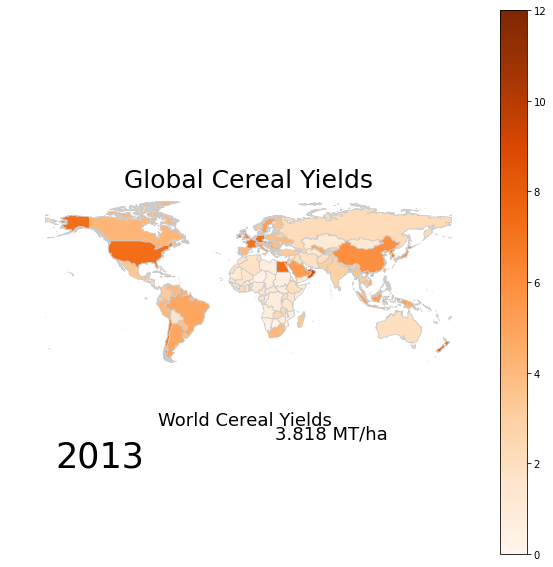

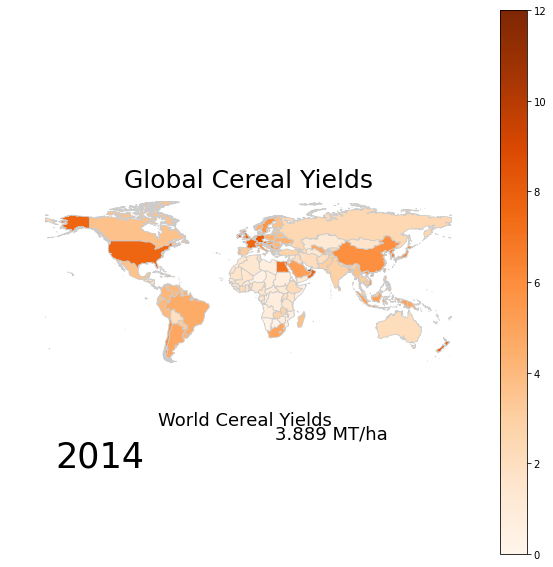

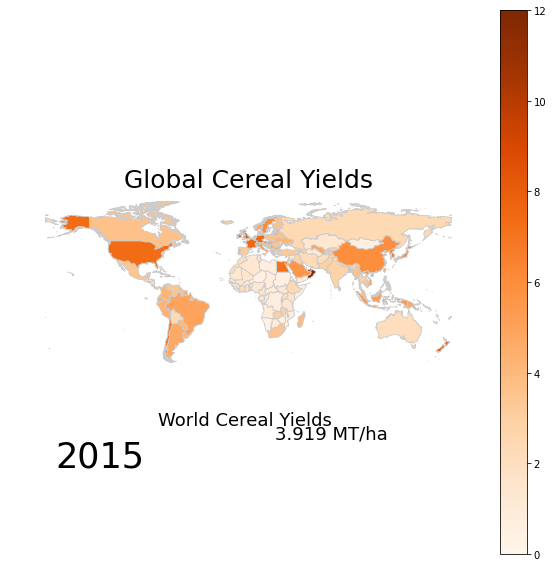

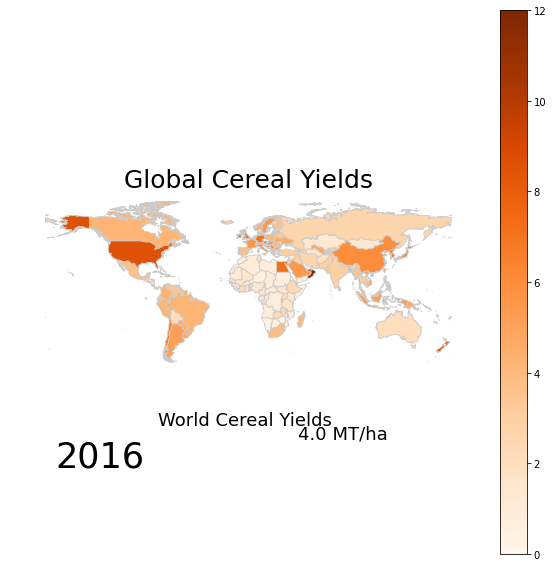

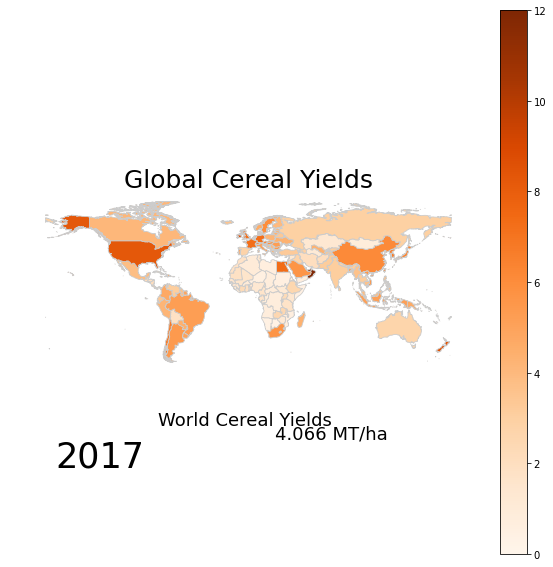

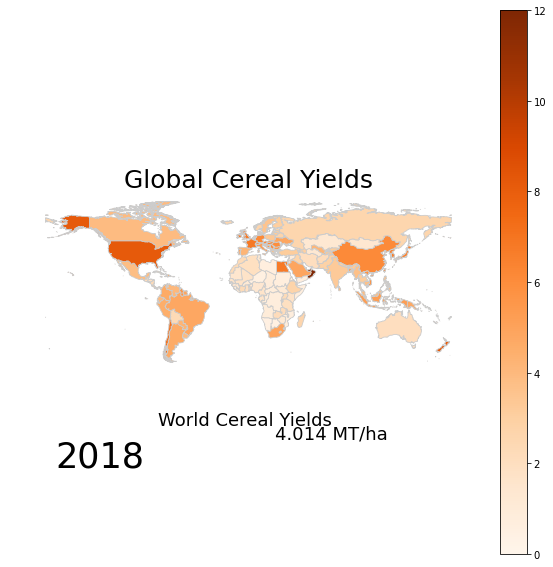

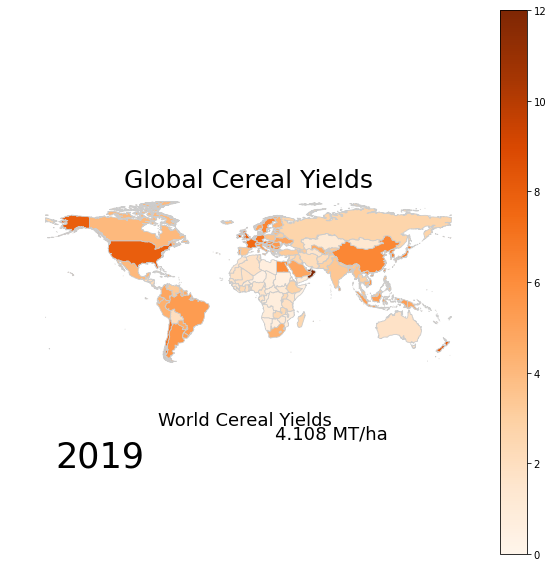

In [56]:
# Loop year year to create image for global crop yields
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year) & (merged["Item Code"] == 1717))]
    # create map showing data by country
    fig = df_new.plot(column='YIELD_MT_HA', cmap='Oranges', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Get world grain yields value from world_data_df
    value = world_data_df.loc[world_data_df['Year'] == year, 'YIELD_MT_HA_Text'].iloc[0]
    
    # Create a title
    fig.set_title('Global Cereal Yields', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # Add total world cereal yields to graph
    fig.annotate('World Cereal Yields', xy=(0.6, .275), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='top', 
                 fontsize=18)
    fig.annotate(value, xy=(0.7, .25), xycoords='figure fraction', 
                 horizontalalignment='right', verticalalignment='top', 
                 fontsize=18)
    
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_cereal_yield.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [57]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_cereal_yield.jpg')
    im1.save(str(year) + '_cereal_yield.png')
    os.remove(str(year) + '_cereal_yield.jpg')

In [58]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith("cereal_yield.png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [59]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith("cereal_yield.png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_Cereal_Yield.gif", images, fps=1)
